# Figure generation

In [1]:
from IPython.display import Image, display, SVG
import svgutils.transform as sg
import numpy as np
from lxml import etree
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Directory of output figures
output_directory = "output/"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

## Save workflow pngs as svgs

In [3]:
"""vae_workflow_filename = "Fig-1A-VAE architecture.png"
vae_workflow_outfilename = "Fig-1A-VAE architecture.svg"
img = mpimg.imread(vae_workflow_filename)
img_cropped = img[0:250, :, :]
imgplot = plt.imshow(img_cropped)
plt.axis('off')
print(img.shape)
#imgplot.axes.get_xaxis().set_visible(False)
#imgplot.axes.get_yaxis().set_visible(False)
plt.savefig(vae_workflow_outfilename, dpi=500)"""

'vae_workflow_filename = "Fig-1A-VAE architecture.png"\nvae_workflow_outfilename = "Fig-1A-VAE architecture.svg"\nimg = mpimg.imread(vae_workflow_filename)\nimg_cropped = img[0:250, :, :]\nimgplot = plt.imshow(img_cropped)\nplt.axis(\'off\')\nprint(img.shape)\n#imgplot.axes.get_xaxis().set_visible(False)\n#imgplot.axes.get_yaxis().set_visible(False)\nplt.savefig(vae_workflow_outfilename, dpi=500)'

## Figure 1

In [4]:
panel_a = (
    sg.fromfile("fig1A.svg")
)

print(panel_a.root.attrib)

# Convert pt units to pixel units
# Vince's tutorial FTW
panel_a_size = (
    np.round(float(panel_a.root.attrib['width'][:-2])*1.33, 0), 
    np.round(float(panel_a.root.attrib['height'][:-2])*1.33, 0)
)

scale_x = 2.5
scale_y = 2.5

print(f"original: {panel_a_size}")
print(f"scaled:{(panel_a_size[0]*scale_x,panel_a_size[1]*scale_y)}")

panel_a = panel_a.getroot()
panel_a.scale_xy(x=scale_x, y=scale_y)
panel_a.moveto(30,10)

{'width': '210mm', 'height': '297mm', 'viewBox': '0 0 210 297', 'version': '1.1', 'id': 'svg1022', '{http://www.inkscape.org/namespaces/inkscape}version': '0.92.4 (5da689c313, 2019-01-14)', '{http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd}docname': 'fig1A_importasPDF.svg'}
original: (279.0, 395.0)
scaled:(697.5, 987.5)


In [5]:
panel_b = (
    sg.fromfile("../human_general_analysis/logs/NN_2500_30/tybalt_2layer_30latent_hist.svg")
)

# Convert pt units to pixel units
# Vince's tutorial FTW
panel_b_size = (
    np.round(float(panel_b.root.attrib['width'][:-2])*1.33, 0), 
    np.round(float(panel_b.root.attrib['height'][:-2])*1.33, 0)
)

scale_x = 0.7
scale_y = 0.7

print(f"original: {panel_b_size}")
print(f"scaled:{(panel_b_size[0]*scale_x,panel_a_size[1]*scale_y)}")

panel_b = panel_b.getroot()
panel_b.scale_xy(x=scale_x, y=scale_y)
panel_b.moveto(600, 30)

original: (613.0, 460.0)
scaled:(429.09999999999997, 276.5)


In [6]:
panel_c = (
    sg.fromfile("fig1C.svg")
)

print(panel_c.root.attrib)

# Convert pt units to pixel units
# Vince's tutorial FTW
panel_c_size = (
    np.round(float(panel_c.root.attrib['width'][:-2])*1.33, 0), 
    np.round(float(panel_c.root.attrib['height'][:-2])*1.33, 0)
)

scale_x = 4
scale_y = 4

print(f"original: {panel_c_size}")
print(f"scaled:{(panel_c_size[0]*scale_x,panel_c_size[1]*scale_y)}")

panel_c = panel_c.getroot()
panel_c.scale_xy(x=scale_x, y=scale_y)
panel_c.moveto(30,300)

{'width': '210mm', 'height': '297mm', 'viewBox': '0 0 210 297', 'version': '1.1', 'id': 'svg3965', '{http://www.inkscape.org/namespaces/inkscape}version': '0.92.4 (5da689c313, 2019-01-14)', '{http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd}docname': 'fig1C.svg'}
original: (279.0, 395.0)
scaled:(1116.0, 1580.0)


In [7]:
panel_a_label = sg.TextElement(10, 20, "A", size=22, weight="bold", font="Verdana")
panel_b_label = sg.TextElement(600, 20, "B", size=22, weight="bold", font="Verdana")
panel_c_label = sg.TextElement(10, 300, "C", size=22, weight="bold", font="Verdana")

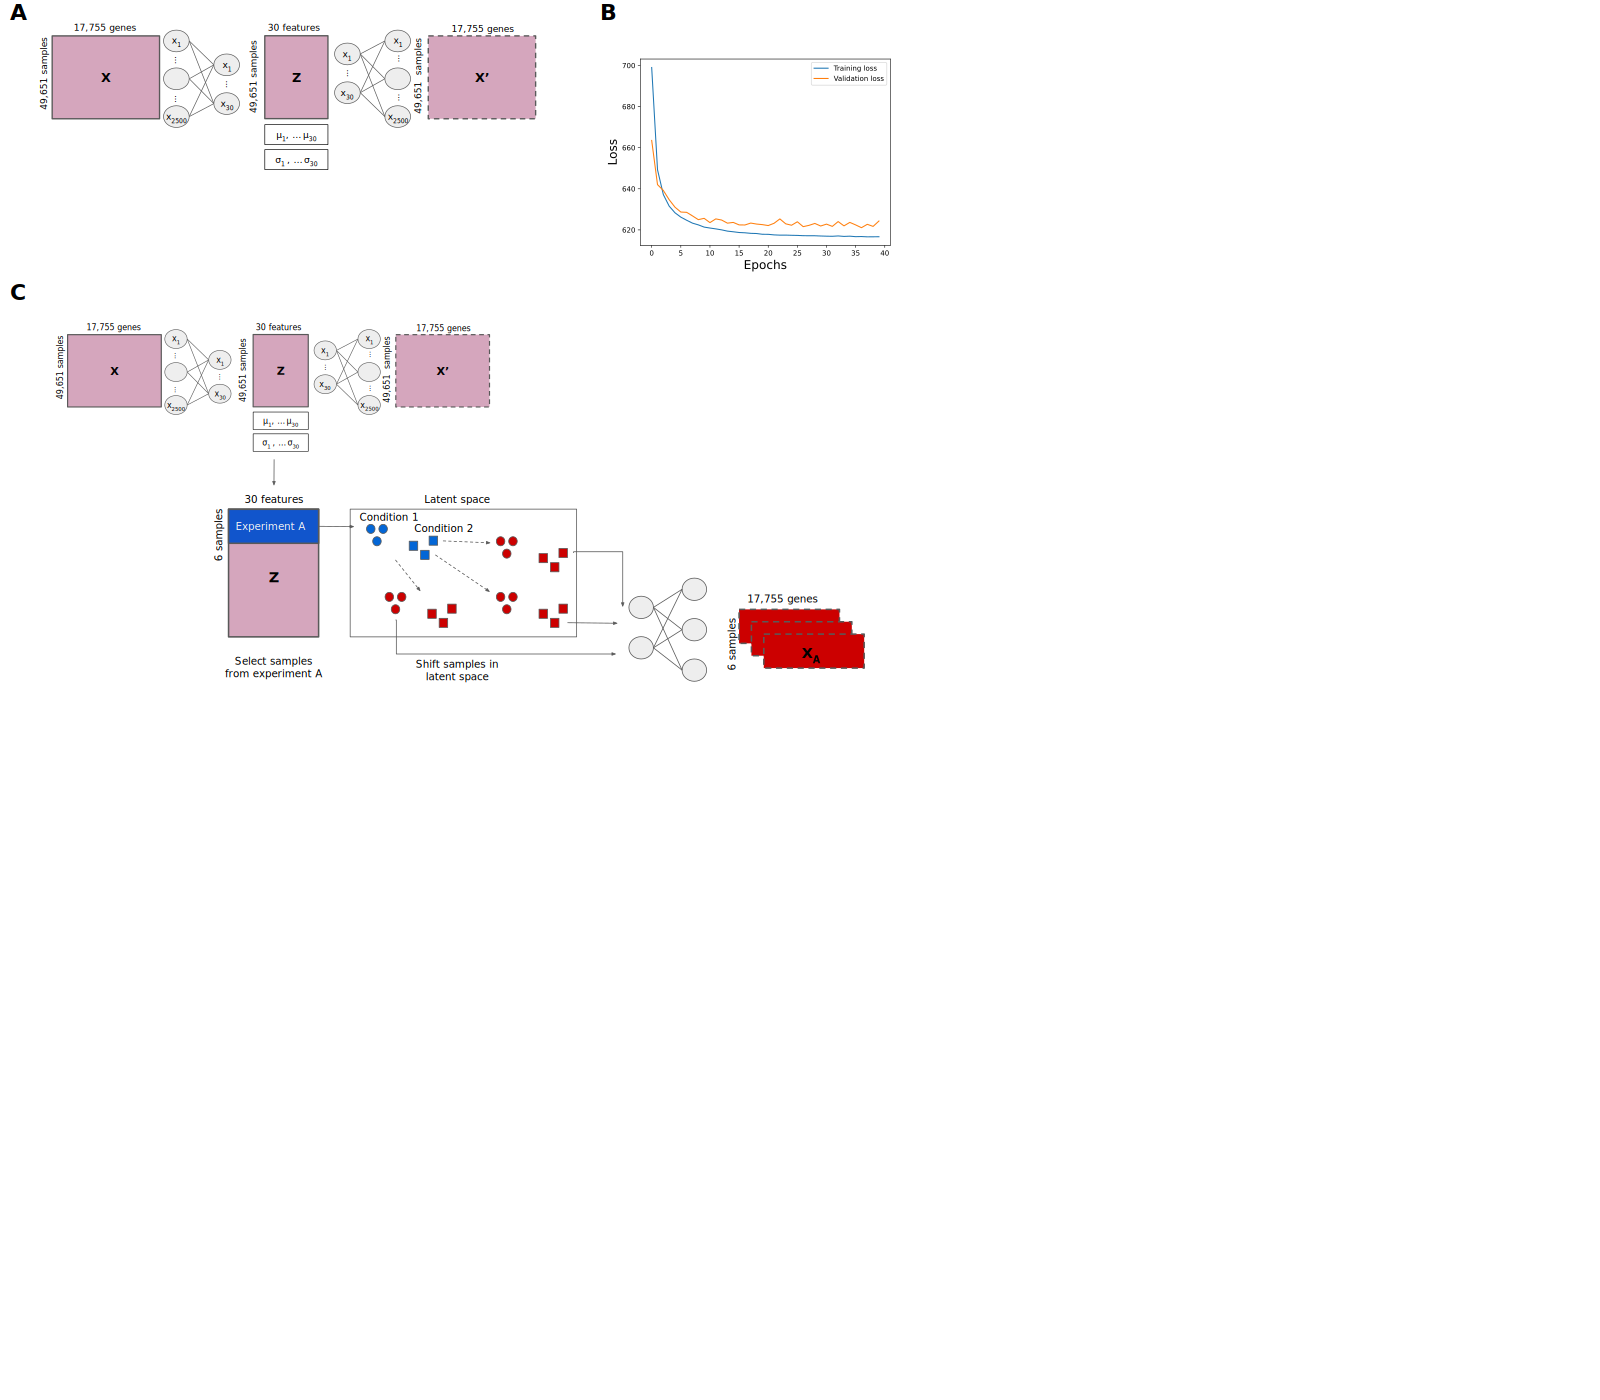

In [8]:
figure_one = sg.SVGFigure("1600", "1400")
figure_one.append([
    etree.Element("rect", {"width":"100%", "height":"100%", "fill":"white"}),
    panel_a, 
    panel_b,
    panel_c,
    panel_a_label,
    panel_b_label,
    panel_c_label
])
display(SVG(figure_one.to_str()))

In [9]:
# save generated SVG files
figure_one.save("output/figure_one.svg")